In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [7]:
df=pd.read_csv("predictive_maintenance.csv")
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [8]:
df = df.drop(["UDI","Product ID"],axis=1)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [9]:
df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [10]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
1922,L,25.85,35.65,1716,26.6,9,0,No Failure,9.8
1286,L,26.35,37.45,1582,40.3,103,0,No Failure,11.1
6479,L,28.45,37.65,1418,42.7,147,0,No Failure,9.2
9550,M,27.35,38.85,1451,43.3,136,0,No Failure,11.5
5026,L,31.75,41.05,1481,40.0,100,0,No Failure,9.3


In [11]:
display(df.shape)
display(df.size)

(10000, 9)

90000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Air temperature [°C]         10000 non-null  float64
 2   Process temperature [°C]     10000 non-null  float64
 3   Rotational speed [rpm]       10000 non-null  int64  
 4   Torque [Nm]                  10000 non-null  float64
 5   Tool wear [min]              10000 non-null  int64  
 6   Target                       10000 non-null  int64  
 7   Failure Type                 10000 non-null  object 
 8   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.2+ KB


In [13]:
!pip install category_encoders

In [15]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(10)

#medium 1
#low 2
#high 3
#Target 0 means no failure 1 means failure
#failure type 1 is no failure
# 2 is power failure
#3 is tool wear failure
# 4 overstrain failure
#5 random failures
# 6 heat dissipation failure (HDF)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,0,1,10.5
1,2,26.05,36.55,1408,46.3,3,0,1,10.5
2,2,25.95,36.35,1498,49.4,5,0,1,10.4
3,2,26.05,36.45,1433,39.5,7,0,1,10.4
4,2,26.05,36.55,1408,40.0,9,0,1,10.5
5,1,25.95,36.45,1425,41.9,11,0,1,10.5
6,2,25.95,36.45,1558,42.4,14,0,1,10.5
7,2,25.95,36.45,1527,40.2,16,0,1,10.5
8,1,26.15,36.55,1667,28.6,18,0,1,10.4
9,1,26.35,36.85,1741,28.0,21,0,1,10.5


In [13]:
#from sklearn.preprocessing import LabelEncoder
#scaler = LabelEncoder()
#df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

In [16]:
X = df.drop(columns=['Failure Type', 'Target'] , axis=1)
y = df["Failure Type"]

In [ ]:
X

In [16]:
y

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      1
49      1
50      2
51      1
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      2
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      3
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

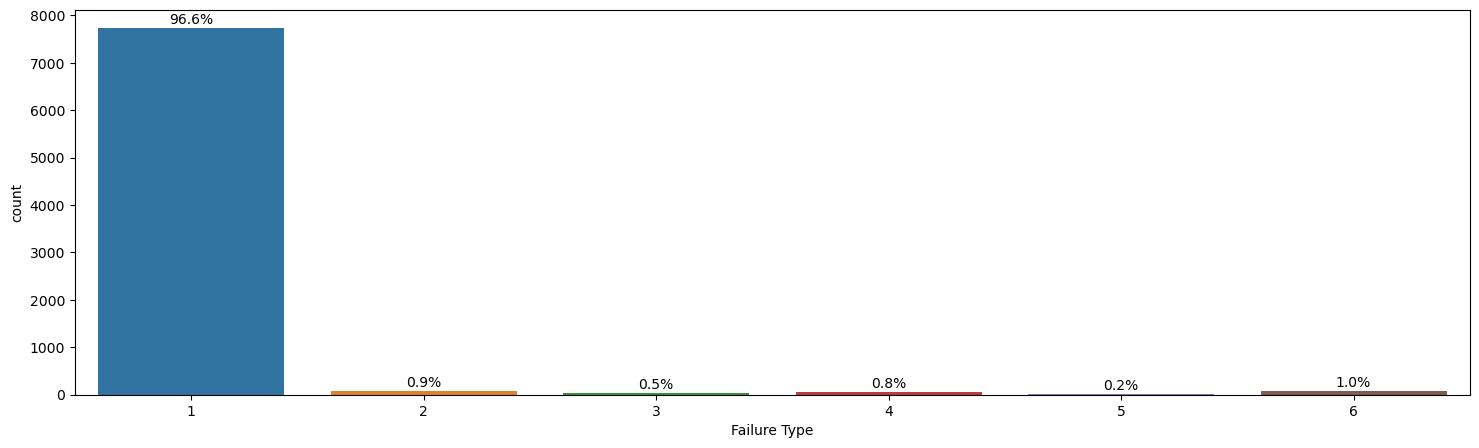

In [18]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_train, palette = 'tab10')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()
#1,2,3,4,5 instead write failure types

In [1]:
#!pip install sklearn.metrics
!pip install -U scikit-learn


In [2]:
#sklearn.metrics.ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
!pip install sklearn.linear_model

ERROR: Could not find a version that satisfies the requirement sklearn.linear_model (from versions: none)
ERROR: No matching distribution found for sklearn.linear_model


In [4]:
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 96.71 %
Model Accuracy Score : 96.05 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           1       0.96      1.00      0.98      1921
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         9
           4       0.57      0.25      0.35        16
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.26      0.21      0.22      2000
weighted avg       0.93      0.96      0.94      2000

--------------------------------------------------------


/Users/aarya/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aarya/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aarya/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: Undefined

In [20]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")



Training Accuracy    : 100.0 %
Model Accuracy Score : 97.6 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99      1921
           2       0.80      0.84      0.82        19
           3       0.00      0.00      0.00         9
           4       0.81      0.81      0.81        16
           5       0.00      0.00      0.00         3
           6       0.96      0.81      0.88        32

    accuracy                           0.98      2000
   macro avg       0.59      0.58      0.58      2000
weighted avg       0.98      0.98      0.98      2000

--------------------------------------------------------


In [ ]:
X_test

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temperature difference [°C]
3644,2,30.05,39.35,1548,32.4,81,9.3
1828,2,25.65,35.05,1351,56.3,174,9.4
6661,1,29.15,38.25,1501,39.8,187,9.1
9216,3,25.55,36.65,1469,43.7,96,11.1
5911,1,28.65,38.25,1288,64.0,3,9.6
7397,2,27.55,38.45,1737,26.1,144,10.9
6403,2,27.95,37.45,1649,33.6,168,9.5
11,3,26.45,36.95,1423,44.3,29,10.5
4782,2,31.65,40.35,1368,52.6,123,8.7
1327,2,26.65,38.05,1814,26.8,204,11.4


In [ ]:
!pip install scikit-learn

In [21]:
# Random Forest
import pickle
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
model_filename = "random_forest_model.pkl"
pickle.dump(random_forest, open(model_filename, "wb"))

y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 100.0 %
Model Accuracy Score : 98.6 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1921
           2       0.86      0.95      0.90        19
           3       0.00      0.00      0.00         9
           4       1.00      0.69      0.81        16
           5       0.00      0.00      0.00         3
           6       0.96      0.78      0.86        32

    accuracy                           0.99      2000
   macro avg       0.63      0.57      0.59      2000
weighted avg       0.98      0.99      0.98      2000

--------------------------------------------------------


/Users/aarya/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aarya/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aarya/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [22]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 96.64 %
Model Accuracy Score : 96.05 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           1       0.96      1.00      0.98      1921
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.16      0.17      0.16      2000
weighted avg       0.92      0.96      0.94      2000

--------------------------------------------------------


/Users/aarya/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aarya/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aarya/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [23]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree'
    ],

    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train],

    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy
    ]
})

In [24]:
pd.set_option('display.precision', 2)
models.sort_values(by='Model Accuracy Score', ascending=False)


,Model,Training Accuracy,Model Accuracy Score
3,Decision Tree,100.00,98.60
2,Random Forest,100.00,97.60
0,Support Vector Machines,96.71,96.05
1,Logistic Regression,96.64,96.05


In [25]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

[1 1 1 ... 1 1 1]


In [26]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5)

,Actual,Predicted
3218,1,1
9902,1,1
3588,1,1
3508,1,1
822,1,1


In [32]:
# arr=[2,30.05,	39.35,	1548,	32.4,	81,	0	,9.3]
# arr2=arr.reshape(1, -1)
#prediction1 = random_forest.predict(np.array([2,30.05,	39.35,	1548,	32.4,	81,	0	,9.3]))
#print(prediction1)
#test = np.array([[2, 30.05, 39.35, 1548, 32.4, 81, 0, 9.3]])
test2 = np.array([[3,	26.45,	36.95,	1423,	44.3,	29,	10.5]])#sample 11
#test2 = np.array([[2,	25.85,	36.05,	1442,	44.1,	204,	10.2]])#sample 243
#test2 = np.array([[2,	26.15,	37.15,	1337,	56.1,	206,	11.0]])#sample 9830
prediction2 = random_forest.predict((test2))
prediction2


array([1])

In [27]:
# arr=[2,30.05,	39.35,	1548,	32.4,	81,	0	,9.3]
# arr2=arr.reshape(1, -1)
#prediction1 = random_forest.predict(np.array([2,30.05,	39.35,	1548,	32.4,	81,	0	,9.3]))
#print(prediction1)
#test = np.array([[2, 30.05, 39.35, 1548, 32.4, 81, 0, 9.3]])
test2 = np.array([[3,	26.45,	36.95,	1423,	44.3,	29,	10.5]])#sample 11
#test2 = np.array([[2,	25.85,	36.05,	1442,	44.1,	204,	10.2]])#sample 243
#test2 = np.array([[2,	26.15,	37.15,	1337,	56.1,	206,	11.0]])#sample 9830
prediction2 = decision.predict((test2))
prediction2


/Users/aarya/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
filename = '/content/drive/My Drive/finalized_model.sav'
pickle.dump(random_forest, open(filename, 'wb'))